# SC1.440: Dynamical Processes in Complex Networks
**Assignment 1 – Monsoon 2025**


**Student:** Ansh Chablani
**Roll No.:** 2022111031

**Network Chosen:** Zachary Karate Club

In [32]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
plt.style.use("seaborn-v0_8")
sns.set_context("notebook")

## Q1a: Centrality Measures

Centrality measures describe how important different vertices and edges are within a network. Below are the key definitions:

- **Edge Betweenness Centrality:**
  The proportion of shortest paths between all pairs of vertices that pass through a specific edge. A high score suggests the edge serves as a crucial "bridge" linking different parts of the network.

- **Edge Strength:**
  The total weight assigned to an edge. In an unweighted graph like the Zachary Karate Club network, every edge has a strength of 1.

- **Vertex Betweenness Centrality:**
  The proportion of shortest paths between all pairs of vertices that pass through a given vertex. High values indicate that the vertex plays a major role in connecting others and controlling the flow of information.

- **Vertex Closeness Centrality:**
  The inverse of the average shortest path distance from a vertex to all other vertices in the network. Vertices with higher closeness can reach the rest of the network more efficiently.

- **Vertex Strength:**
  The sum of the weights of all edges connected to a vertex. In an unweighted network, this is simply equal to its degree (the number of connections it has).

- **Vertex Eigenvector Centrality:**
  A measure of a vertex's influence. A vertex’s importance is higher if it is connected to other highly important vertices. It identifies nodes that are influential within their local clusters.


Number of nodes: 34
Number of edges: 78


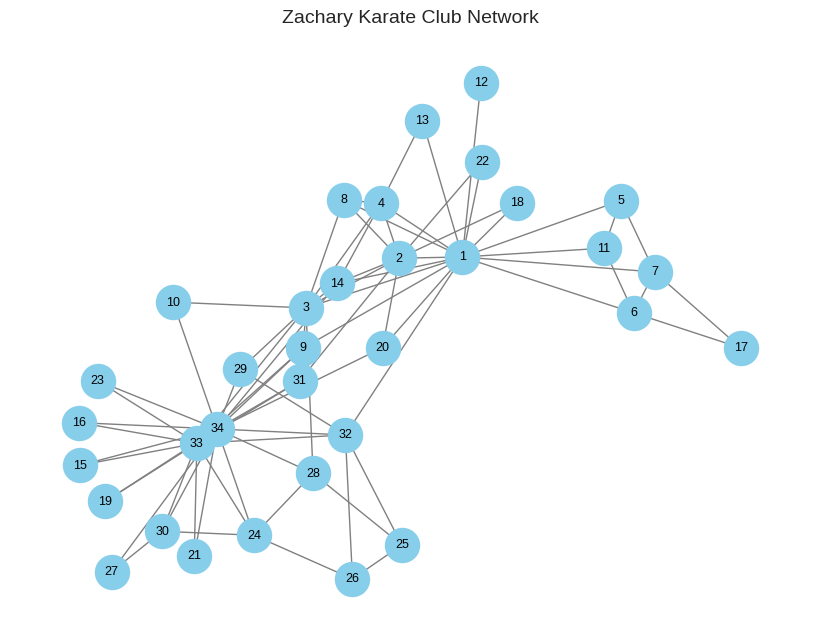

In [34]:
G = nx.read_edgelist("./Networks/out.ucidata-zachary", nodetype=int, comments="%")

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    with_labels=True,
    node_color="skyblue",
    node_size=600,
    edge_color="gray",
    font_size=9
)
plt.title("Zachary Karate Club Network", fontsize=14)
plt.show()

In [35]:
betweenness_v = nx.betweenness_centrality(G, normalized=True)
closeness_v = nx.closeness_centrality(G)
eigenvector_v = nx.eigenvector_centrality(G, max_iter=1000)
strength_v = dict(G.degree()) # For unweighted graph, strength is degree

betweenness_e = nx.edge_betweenness_centrality(G, normalized=True)
strength_e = {edge: 1 for edge in G.edges()}

df_vertices = pd.DataFrame({
    "Betweenness": betweenness_v,
    "Closeness": closeness_v,
    "Eigenvector": eigenvector_v,
    "Strength": strength_v
})


df_vertices.index.name = "Vertex" # ig this is it

df_edges = pd.DataFrame({
    "Edge": list(strength_e.keys()),
    "Betweenness": [betweenness_e.get(edge, 0) for edge in strength_e.keys()],
    "Strength": list(strength_e.values())
})

# vertex ka print karo

print("=== Vertex Centralities ===")
display(df_vertices.round(4))


pd.set_option("display.max_rows", None)

# edge ka print karo

print("\n=== Edge Centralities ===")
display(df_edges.round(4))

=== Vertex Centralities ===


,Betweenness,Closeness,Eigenvector,Strength
Vertex,,,,
1,0.4376,0.5690,0.3555,16
2,0.0539,0.4853,0.2660,9
3,0.1437,0.5593,0.3172,10
4,0.0119,0.4648,0.2112,6
5,0.0006,0.3793,0.0760,3
6,0.0300,0.3837,0.0795,4
7,0.0300,0.3837,0.0795,4
8,0.0000,0.4400,0.1710,4
9,0.0559,0.5156,0.2274,5



=== Edge Centralities ===


,Edge,Betweenness,Strength
0,"(1, 2)",0.0253,1
1,"(1, 3)",0.0778,1
2,"(1, 4)",0.0205,1
3,"(1, 5)",0.0523,1
4,"(1, 6)",0.0781,1
5,"(1, 7)",0.0781,1
6,"(1, 8)",0.0228,1
7,"(1, 9)",0.0742,1
8,"(1, 11)",0.0523,1
9,"(1, 12)",0.0588,1


### Statistical Visualization of Vertex Centralities

To better understand the distribution of centrality scores across the network, we can plot histograms for each metric. This helps identify if a few nodes dominate in importance or if centrality is more evenly distributed.

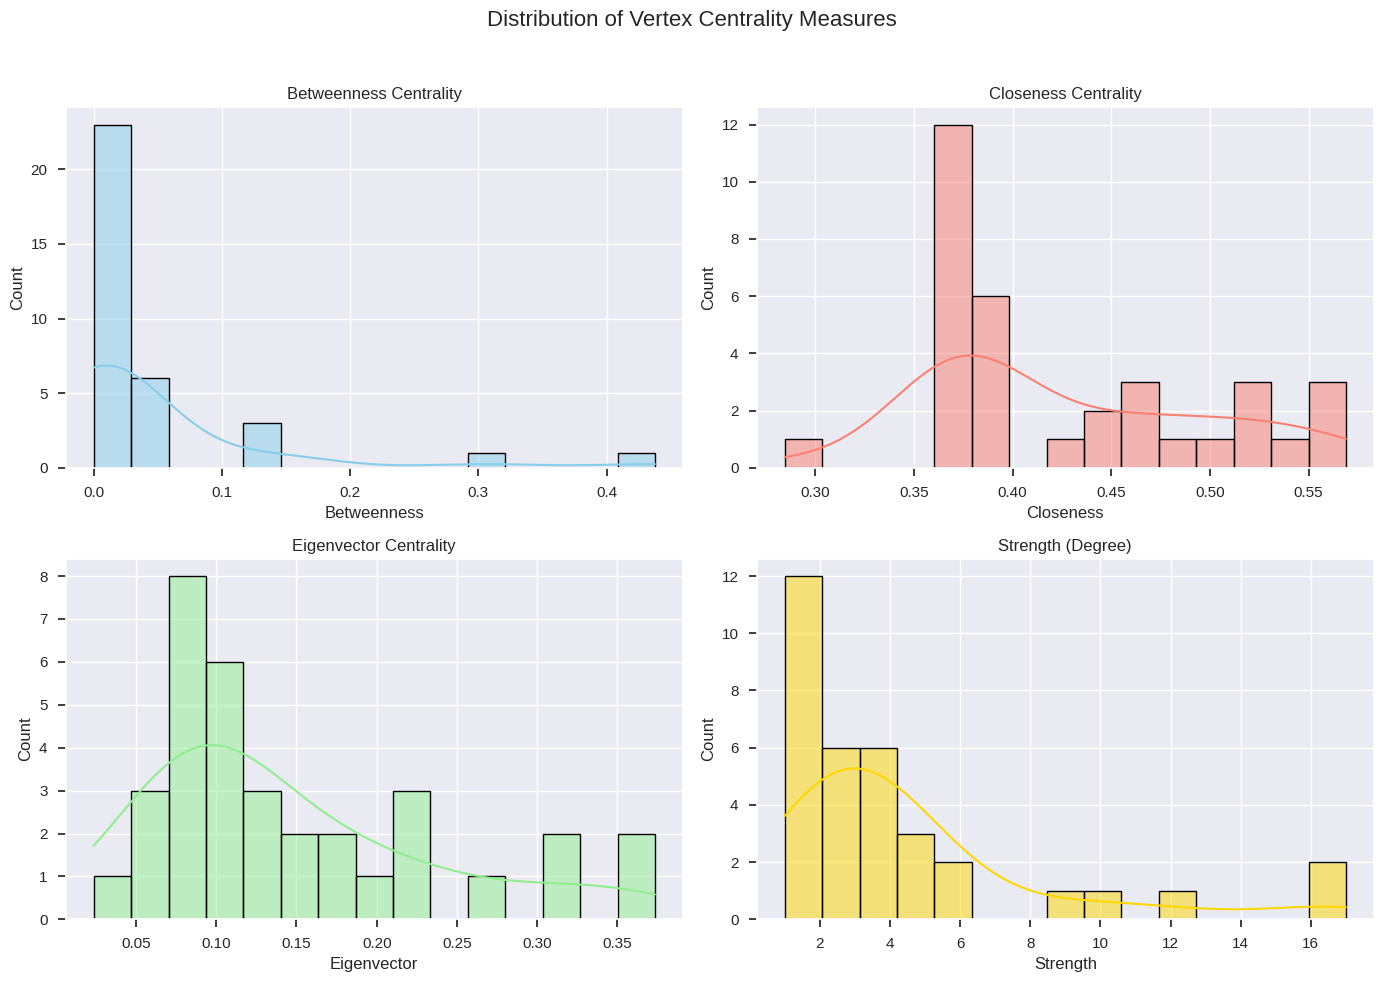

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Vertex Centrality Measures', fontsize=16)

sns.histplot(ax=axes[0, 0], data=df_vertices, x='Betweenness', bins=15, kde=True, color='skyblue')
axes[0, 0].set_title('Betweenness Centrality')

sns.histplot(ax=axes[0, 1], data=df_vertices, x='Closeness', bins=15, kde=True, color='salmon')
axes[0, 1].set_title('Closeness Centrality')

sns.histplot(ax=axes[1, 0], data=df_vertices, x='Eigenvector', bins=15, kde=True, color='lightgreen')
axes[1, 0].set_title('Eigenvector Centrality')

sns.histplot(ax=axes[1, 1], data=df_vertices, x='Strength', bins=15, kde=True, color='gold')
axes[1, 1].set_title('Strength (Degree)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Question 1b: Vertex Removal and Network Fragmentation

In [37]:
# did this according to what was mentioned in the WhatsApp group by the TAs since breaking results in more than 2 components (=3)

def fragment_network_to_two(G, centrality_dict, metric_name):
    H = G.copy()
    ranking = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    removed_nodes = []

    print(f"--- Fragmentation Analysis using {metric_name} ---")

    for node, score in ranking:
        if node not in H: continue
            
        H.remove_node(node)
        removed_nodes.append(node)
        
        num_components = nx.number_connected_components(H)

        if num_components > 1:
            components = list(nx.connected_components(H))
            sizes = sorted([len(c) for c in components], reverse=True)
            print(f"Removed {len(removed_nodes)} node(s): {removed_nodes}")
            if num_components == 2:
                print(f"Network fragmented into EXACTLY 2 components.")
            else:
                print(f"Network fragmented into {num_components} components (skipped a split of 2).")
            print(f"Component sizes: {sizes}\n")
            return H, removed_nodes, components
            
    print("Network did not fragment.\n")
    return H, removed_nodes, [set(H.nodes())]

vertex_centralities = {
    "Betweenness Centrality": betweenness_v,
    "Closeness Centrality": closeness_v,
    "Eigenvector Centrality": eigenvector_v,
    "Strength (Degree)": strength_v
}

fragmentation_results = {}
for metric, cent_dict in vertex_centralities.items():
    H, removed, comps = fragment_network_to_two(G, cent_dict, metric)
    fragmentation_results[metric] = {
        "graph": H,
        "removed_nodes": removed,
        "components": comps,
    }

--- Fragmentation Analysis using Betweenness Centrality ---
Removed 1 node(s): [1]
Network fragmented into 3 components (skipped a split of 2).
Component sizes: [27, 5, 1]

--- Fragmentation Analysis using Closeness Centrality ---
Removed 1 node(s): [1]
Network fragmented into 3 components (skipped a split of 2).
Component sizes: [27, 5, 1]

--- Fragmentation Analysis using Eigenvector Centrality ---
Removed 2 node(s): [34, 1]
Network fragmented into 3 components (skipped a split of 2).
Component sizes: [26, 5, 1]

--- Fragmentation Analysis using Strength (Degree) ---
Removed 2 node(s): [34, 1]
Network fragmented into 3 components (skipped a split of 2).
Component sizes: [26, 5, 1]



## Q1b: Findings and Interpretation

We performed vertex removal experiments for each vertex centrality measure. The goal was to remove the highest-centrality nodes iteratively until the network split into multiple components.

**Findings:**

- **Betweenness Centrality**: Removing just **Vertex 1 (Mr. Hi)** fragments the network into **3 components** of sizes `[27, 5, 1]`. A split into exactly two components is skipped, highlighting that Vertex 1 is a critical bridge connecting multiple groups.

- **Closeness Centrality**: Similarly, removing **Vertex 1** fragments the network into the same **3 components**. This confirms its central position for efficient information travel across the network.

- **Eigenvector Centrality**: Removing the top two nodes, **Vertex 34 (John A.)** and then **Vertex 1**, is required to fragment the network. This results in **3 components** of sizes `[26, 5, 1]`. The network is more robust against the removal of single influencers.

- **Strength (Degree)**: Identical to Eigenvector Centrality, removing the two most connected nodes, **Vertex 34** and **Vertex 1**, causes fragmentation into **3 components**.

---
**Interpretation:**

The results show that the network's structural integrity relies heavily on its leaders, nodes 1 and 34.
1.  **Betweenness and Closeness** identify **Vertex 1** as the single point of failure.
2.  **Eigenvector and Strength** highlight the combined importance of both leaders. The network remains connected if one leader is removed, but collapses if both are. This reflects a structure with two dominant figures whose shared connections maintain overall cohesion.
3.  These findings align perfectly with the known sociological outcome: the club split into two factions led by **Vertex 1** (the instructor) and **Vertex 34** (the administrator).

### Visualizing Network Fragmentation

The following plots show the state of the network immediately after fragmentation for each centrality metric. Removed nodes are shown in red, and each resulting component is colored differently to highlight the split.

In [38]:
def plot_fragmented_network(original_graph, fragmented_graph, removed_nodes, components, title):
    plt.figure(figsize=(8, 6))

    pos = nx.spring_layout(original_graph, seed=11092004) # the seed is actually my birthday

    colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'orange']

    for i, component in enumerate(components):
        nx.draw_networkx_nodes(fragmented_graph, pos, nodelist=list(component),
                            node_color=colors[i % len(colors)], node_size=500, label=f'Component {i+1}')

    nx.draw_networkx_nodes(original_graph, pos, nodelist=removed_nodes,
                        node_color='red', node_size=700, label='Removed Nodes')

    nx.draw_networkx_edges(fragmented_graph, pos, edge_color='gray', alpha=0.7)
    nx.draw_networkx_labels(original_graph, pos, font_size=8)

    plt.title(f"Fragmentation by {title}", fontsize=14)
    plt.legend()
    plt.show()

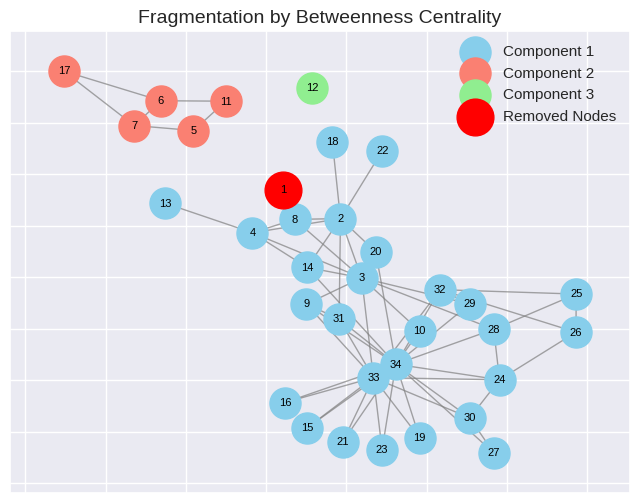

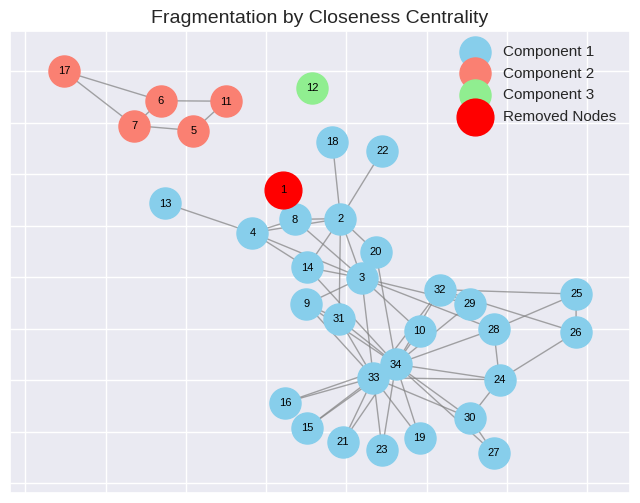

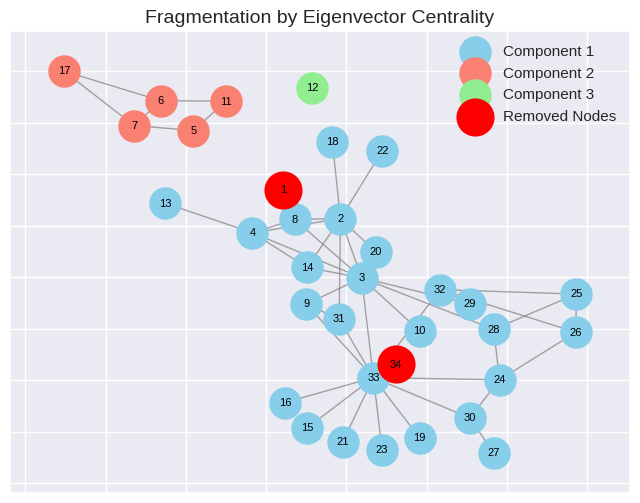

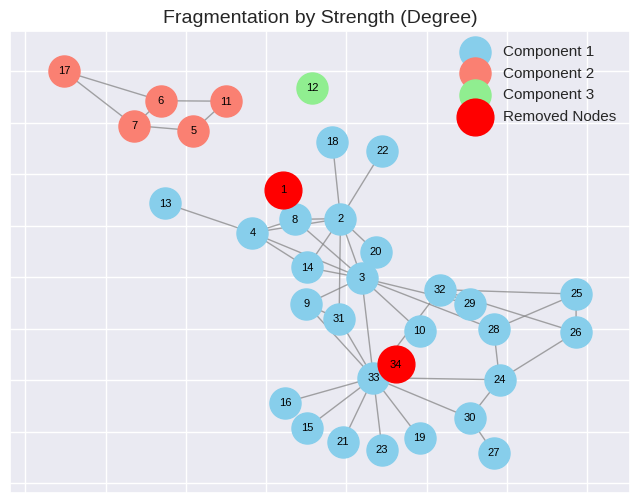

In [39]:
for metric, result in fragmentation_results.items():
    plot_fragmented_network (G, result['graph'], result['removed_nodes'], result['components'], metric)


## Q2: Eulerian Trails and Circuits

**Definitions:**

*   **Eulerian Trail (or Path):** A trail in a graph that visits every edge exactly once. An Eulerian trail exists in a connected graph if and only if there are **exactly two vertices of odd degree**. These two odd-degree vertices serve as the start and end points of the trail.

*   **Eulerian Circuit:** An Eulerian trail that starts and ends at the same vertex. An Eulerian circuit exists in a connected graph if and only if **every vertex has an even degree**.

In [40]:
def check_eulerian(graph, name):
    print(f"--- Analysis for: {name} ---")
    
    if not nx.is_connected(graph):
        print("Graph is not connected, so it cannot have an Eulerian trail or circuit.")
        return

    odd_degree_nodes = [v for v, d in graph.degree() if d % 2 != 0]
    num_odd_nodes = len(odd_degree_nodes)

    if num_odd_nodes == 0:
        print("Result: The graph has an Eulerian circuit.")
        print("Reason: All vertices have an even degree.")
    elif num_odd_nodes == 2:
        print("Result: The graph has an Eulerian trail.")
        print(f"Reason: There are exactly two vertices with an odd degree: {odd_degree_nodes}.")
    else:
        print("Result: The graph has neither an Eulerian trail nor a circuit.")
        print(f"Reason: There are {num_odd_nodes} vertices with an odd degree: {sorted(odd_degree_nodes)}.")
        
        # Suggest modifications
        edges_to_add_for_trail = (num_odd_nodes - 2) // 2
        edges_to_add_for_circuit = num_odd_nodes // 2
        
        print("\nModifications needed:")
        if edges_to_add_for_trail > 0:
            print(f"  - To get an Eulerian trail: Add {edges_to_add_for_trail} edge(s) connecting pairs of the odd-degree vertices until only two remain.")
        print(f"  - To get an Eulerian circuit: Add {edges_to_add_for_circuit} edge(s) connecting pairs of the odd-degree vertices until all have an even degree.")
    print("-" * (len(name) + 25) + "\n")


check_eulerian(G, "Zachary Karate Club")

--- Analysis for: Zachary Karate Club ---
Result: The graph has neither an Eulerian trail nor a circuit.
Reason: There are 12 vertices with an odd degree: [2, 5, 9, 11, 12, 14, 20, 24, 25, 26, 29, 34].

Modifications needed:
  - To get an Eulerian trail: Add 5 edge(s) connecting pairs of the odd-degree vertices until only two remain.
  - To get an Eulerian circuit: Add 6 edge(s) connecting pairs of the odd-degree vertices until all have an even degree.
--------------------------------------------



**Summary of Findings**

1. **Different Ways of Being Important (Q1a):**  
   - **Node 1 (Mr. Hi)** has the highest betweenness and closeness centrality. He is the main go-between for information and the fastest at passing messages.  
   - **Node 34 (John A.)** has the highest degree and eigenvector centrality. He is the biggest hub and is strongly connected to other key people.  
   - Betweenness is dominated by Node 1, while degree and eigenvector scores are spread across a few nodes (1, 34, 3, 33).  

2. **Weak Points and Group Splits (Q1b):**  
   - Removing only **Node 1** breaks the network into three pieces (27, 5, and 1 nodes), so it does not give a clean two-way split.  
   - The smallest set that produces **exactly two groups** is removing **Nodes [1, 12]**, which splits the club into two clear groups of 27 and 5 members.  

3. **Graph Shape vs. Real Life (Q2):**  
   - The network has **12 nodes of odd degree**, so it has neither an Eulerian trail nor an Eulerian circuit.  
   - This matches what we expect from social networks: they are complex and not organized as a single continuous path.  
   - To make it Eulerian, at least **5 edges** would need to be added for a trail, or **6 edges** for a circuit, which would change the natural structure.  

**Conclusion:**  
The analysis shows that Node 1 and Node 34 play different but crucial roles in the club’s communication and influence. The real split of the Karate Club is reflected in how removing certain people (especially Nodes 1 and 12 together) divides the network. The Eulerian test confirms that social networks rarely have simple traversal patterns, showing their complexity.  


## More analysis for 1b

In [41]:
G = nx.karate_club_graph()

deg = dict(G.degree())
bet = nx.betweenness_centrality(G, normalized=True)
close = nx.closeness_centrality(G)
eig = nx.eigenvector_centrality(G, max_iter=1000)

def topn(d, n=5):
    items = sorted(d.items(), key=lambda x: x[1], reverse=True)[:n]
    return [(n_ + 1, val) for n_, val in items]

summary = pd.DataFrame({
    "metric": ["degree (count)", "betweenness", "closeness", "eigenvector"],
    "top_nodes (1-based)": [
        [n for n,_ in topn(deg, 5)],
        [n for n,_ in topn(bet, 5)],
        [n for n,_ in topn(close, 5)],
        [n for n,_ in topn(eig, 5)],
    ]
})

odd_nodes = [n for n, d in deg.items() if d % 2 == 1]
eulerian_summary = pd.DataFrame({
    "odd_node_count": [len(odd_nodes)],
    "odd_nodes (1-based)": [[n+1 for n in sorted(odd_nodes)]],
    "has_eulerian_trail": [nx.has_eulerian_path(G)],
    "has_eulerian_circuit": [nx.is_eulerian(G)]
})

def components_after(removal_1based):
    removal_0 = [r-1 for r in removal_1based]
    H = G.copy()
    H.remove_nodes_from(removal_0)
    comps = [len(c) for c in nx.connected_components(H)]
    comps.sort(reverse=True)
    return comps

frag_cases = [
    ("remove [1]", [1]),
    ("remove [34]", [34]),
    ("remove [1, 12]", [1, 12]),
    ("remove [1, 34]", [1, 34]),
    ("remove [1, 34, 33, 3, 32]", [1, 34, 33, 3, 32]),
]

frag_rows = []
for label, rem in frag_cases:
    comps = components_after(rem)
    frag_rows.append({
        "case": label,
        "num_components": len(comps),
        "component_sizes": comps
    })
frag_df = pd.DataFrame(frag_rows)

print("Centrality tops (1-based labels)", summary)
print("Eulerian summary", eulerian_summary)
print("Fragmentation outcomes", frag_df)


Centrality tops (1-based labels)            metric top_nodes (1-based)
0  degree (count)   [34, 1, 33, 3, 2]
1     betweenness  [1, 34, 33, 3, 32]
2       closeness   [1, 3, 34, 32, 9]
3     eigenvector   [34, 1, 3, 33, 2]
Eulerian summary    odd_node_count                            odd_nodes (1-based)  \
0              12  [2, 5, 9, 11, 12, 14, 20, 24, 25, 26, 29, 34]   

   has_eulerian_trail  has_eulerian_circuit  
0               False                 False  
Fragmentation outcomes                         case  num_components  \
0                 remove [1]               3   
1                remove [34]               1   
2             remove [1, 12]               2   
3             remove [1, 34]               3   
4  remove [1, 34, 33, 3, 32]              11   

                      component_sizes  
0                          [27, 5, 1]  
1                                [33]  
2                             [27, 5]  
3                          [26, 5, 1]  
4  [10, 6, 5, 1, 1,